<a href="https://colab.research.google.com/github/fengfrankgthb/Demonstrations/blob/main/SAT%20VOC%20500%26600.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAT Word Cloud Project



In [1]:
# Cell 1: Install necessary libraries
!pip install wordcloud matplotlib nltk google-generativeai

In [10]:
# Cell 2: Import punkt_tab
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import google.generativeai as genai
from IPython.display import Markdown, display

# Download necessary NLTK data (if not already downloaded)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords', quiet=True)
try:
    word_tokenize("test string to check punkt") # Test tokenization
except LookupError:
    nltk.download('punkt', quiet=True)
    # Explicitly download 'punkt_tab' as indicated by the error
    nltk.download('punkt_tab', quiet=True)


# Define a helper function to print markdown
def printmd(string):
    display(Markdown(string))

print("Cell 2: Libraries imported and NLTK resources checked/downloaded.")

Cell 2: Libraries imported and NLTK resources checked/downloaded.


In [4]:
# Cell 3: Configure Gemini API Key
try:
    from google.colab import userdata
    GEMINI_API_KEY = userdata.get('GOOGLE_API_KEY')
    genai.configure(api_key=GEMINI_API_KEY)
    model = genai.GenerativeModel('gemini-1.5-flash') # Using gemini-1.5-flash model
    print("Gemini API Key configured successfully.")
except Exception as e:
    print(f"Error configuring Gemini API Key: {e}")
    print("Please ensure you have set the GEMINI_API_KEY secret in Colab.")
    GEMINI_API_KEY = None # Set to None if not found
    model = None

Gemini API Key configured successfully.


In [5]:
# Cell 4: Helper Functions for Gemini API
def generate_sample_text_llm():
    """Generates a substantial piece of sample text using the Gemini LLM."""
    if not model:
        return "Gemini model not initialized. Please check API key configuration."
    try:
        prompt = "Generate a substantial, interesting, and varied piece of text (around 500-800 words) about the evolution of renewable energy technologies and their future impact on global sustainability. Make sure to use a wide range of vocabulary."
        response = model.generate_content(prompt)
        return response.text
    except Exception as e:
        print(f"Error generating sample text with LLM: {e}")
        return "Error: Could not generate sample text."

def summarize_text_llm(text_to_summarize):
    """Summarizes the given text concisely using the Gemini LLM."""
    if not model:
        return "Gemini model not initialized. Please check API key configuration."
    if not text_to_summarize.strip():
        return "Cannot summarize empty text."
    try:
        prompt = f"Summarize the following text concisely and accurately (around 3-5 sentences):\n\n{text_to_summarize}"
        response = model.generate_content(prompt)
        return response.text
    except Exception as e:
        print(f"Error summarizing text with LLM: {e}")
        return "Error: Could not generate summary."

In [13]:
# Cell 5: Main Word Cloud Generation Function (with size/resolution parameters)

def generate_filtered_wordcloud(text_input,
                                num_top_to_exclude=300,
                                num_words_in_cloud=200,
                                cloud_width=800,    # New: Width of the cloud image in pixels
                                cloud_height=400,   # New: Height of the cloud image in pixels
                                display_dpi=100):   # New: DPI for displaying in notebook
    """
    Generates a word cloud from the input text with specific filtering,
    size, and display resolution.
    """
    if not text_input or not text_input.strip():
        print("Input text is empty. Cannot generate word cloud.")
        return

    print("\n--- Starting Word Cloud Generation ---")

    # 1. Preprocessing: Lowercase and tokenize
    text = text_input.lower()
    words = word_tokenize(text)

    # Remove punctuation and non-alphabetic tokens, and ensure words are at least 2 chars long
    words = [word for word in words if word.isalpha() and len(word) > 1]

    # 2. Remove standard English stop words
    stop_words_set = set(stopwords.words('english'))
    words_after_standard_stops = [word for word in words if word not in stop_words_set]

    if not words_after_standard_stops:
        print("No words left after removing standard stop words. Cannot generate word cloud.")
        return

    print(f"Words remaining after standard stop word removal: {len(words_after_standard_stops)}")

    # 3. Calculate initial frequencies
    word_counts = Counter(words_after_standard_stops)

    # 4. Identify the top N words to exclude (after standard stop words)
    top_n_to_exclude_list = [word_info[0] for word_info in word_counts.most_common(num_top_to_exclude)]
    top_n_to_exclude_set = set(top_n_to_exclude_list)

    print(f"Identified top {len(top_n_to_exclude_list)} words to exclude (after standard stops).")

    # 5. Filter again to remove these top N words
    filtered_word_counts = Counter({
        word: count for word, count in word_counts.items()
        if word not in top_n_to_exclude_set
    })

    if not filtered_word_counts:
        print(f"No words left after excluding the top {num_top_to_exclude} most frequent words. Cannot generate word cloud.")
        return

    print(f"Words remaining after all filtering: {len(filtered_word_counts)}")

    # 6. Generate the word cloud from the filtered frequencies
    print(f"Attempting to generate word cloud with up to {num_words_in_cloud} words...")
    print(f"Image dimensions: {cloud_width}x{cloud_height} pixels.")
    try:
        wordcloud_generator = WordCloud(
            width=cloud_width,             # Use the new width parameter
            height=cloud_height,           # Use the new height parameter
            background_color='white',
            stopwords=None,
            max_words=num_words_in_cloud,
            colormap='viridis',
            collocations=False
        ).generate_from_frequencies(filtered_word_counts)

        # 7. Display the generated image
        # Adjust figsize to be appropriate for the cloud dimensions and desired display DPI
        # figsize is in inches: (width_pixels / dpi, height_pixels / dpi)
        plt.figure(
            figsize=(cloud_width / display_dpi, cloud_height / display_dpi),
            dpi=display_dpi  # Use the new DPI parameter
        )
        plt.imshow(wordcloud_generator, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud (Excluding Top {num_top_to_exclude} words & Standard Stop Words)")
        plt.show()
        print("Word cloud generated successfully!")
    except Exception as e:
        print(f"Error generating word cloud image: {e}")

    print("--- Word Cloud Generation Complete ---")

➡️ Using text pasted by the user.


**Pasted Text (first 500 chars):**

```
1.  						  210words Some fuel additives contain cerium oxide nanoparticles (CeO2-NPs), which can leach into waterways and soils via waste water. In a 2015 study Mael Garaud and colleagues found that CeO2-NPs can accumulate in the bodies of zebra mussels (Dreissena polymorpha). While bioaccumulation of manufactured nanoparticles may be inherently worrisome, it has been hypothesized that CeO2-NPs bioaccumulation in invertebrate like D. polymorpha could serve a valuable proxy role, observing the n...
```


➡️ Summarizing the text using AI (this might take a moment)...


**Summary of the Text:**

```
The provided text comprises several independent passages, each presenting a distinct research finding or hypothesis.  One passage discusses the use of invertebrate bioaccumulation of nanoparticles as a less costly alternative to vertebrate testing in environmental regulations. Another examines krill consumption differences between Antarctic minke and bowhead whales.  Additional passages explore the use of historical DNA in research, the limitations of 2D representations of architecture, and the complexities of characterizing a novel as autobiographical.  Finally, several passages deal with interpreting research findings and choosing the most logical completion to sentences based on provided context.  The overarching theme is the critical analysis of scientific findings and the effective communication of scientific information.

```


--- Starting Word Cloud Generation ---
Words remaining after standard stop word removal: 9362
Identified top 500 words to exclude (after standard stops).
Words remaining after all filtering: 2888
Attempting to generate word cloud with up to 600 words...
Image dimensions: 4800x3200 pixels.


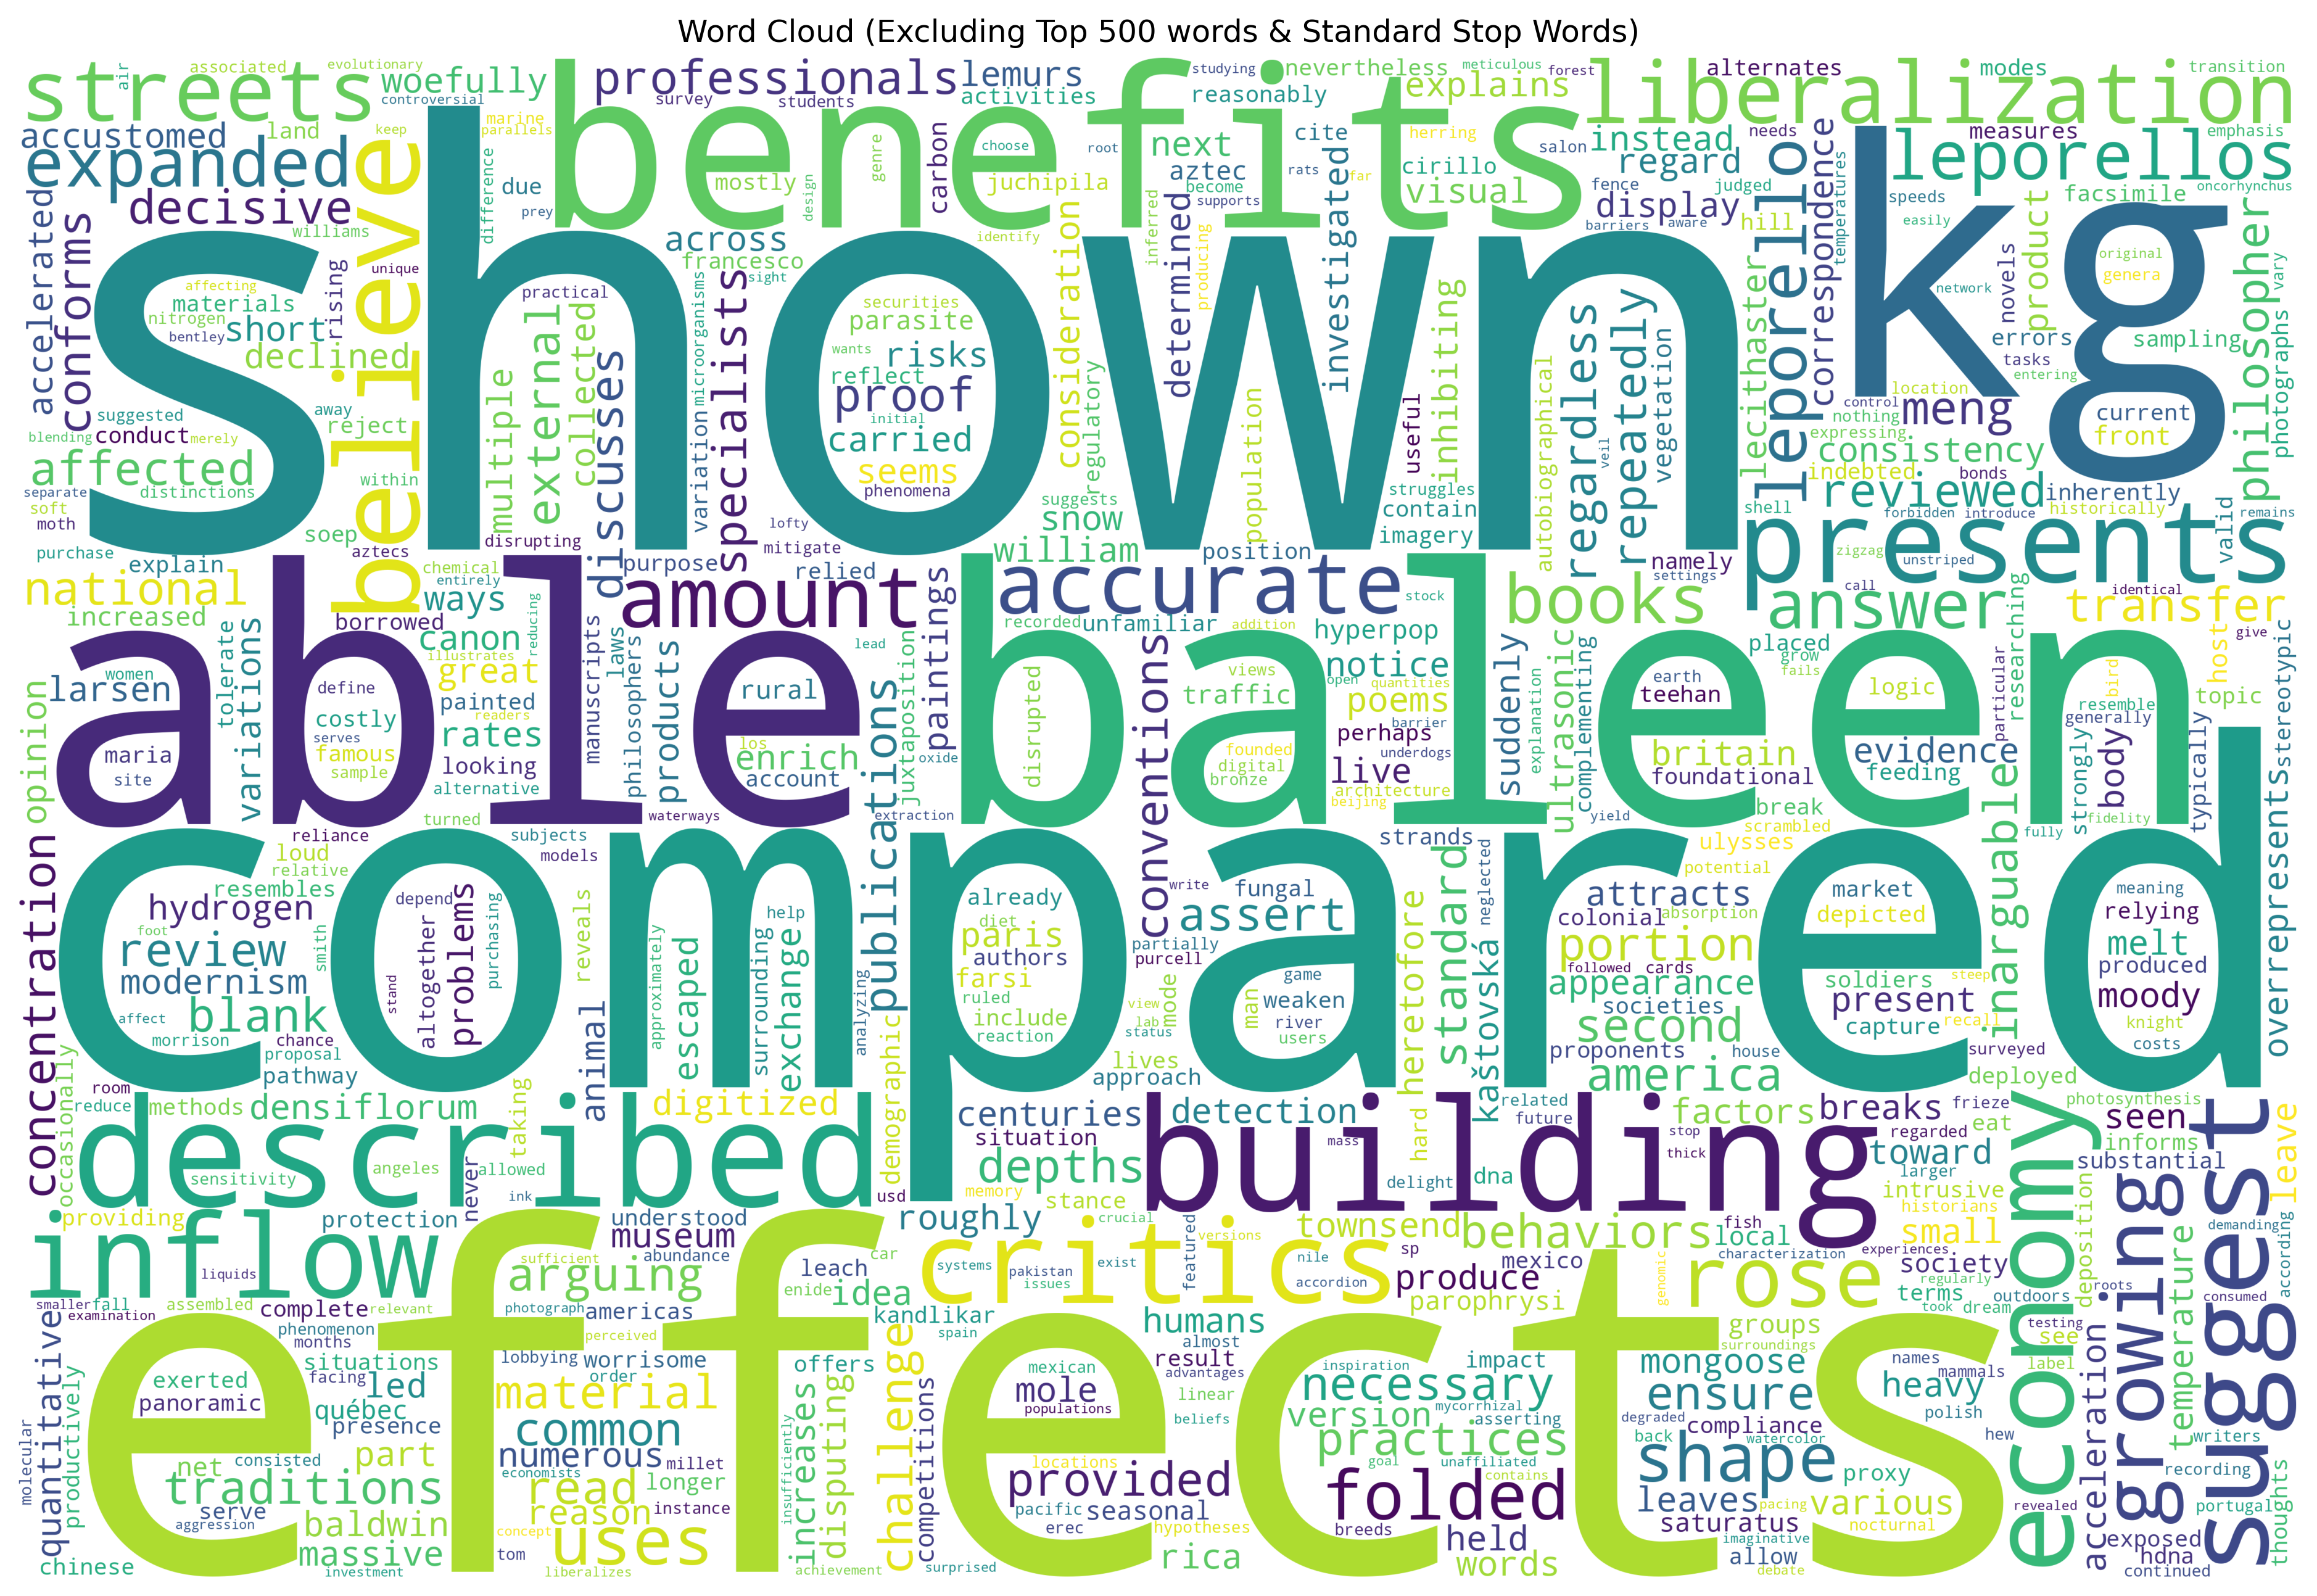

Word cloud generated successfully!
--- Word Cloud Generation Complete ---


In [22]:
# Cell 6 (Interactive): Process Text and Generate Word Cloud with Interactive Inputs (including size/resolution)

#@title Process Text and Generate Word Cloud 📝☁️
#@markdown ### 1. Choose Text Input Method:
use_generated_sample_text = False #@param {type:"boolean"}
#@markdown If `use_generated_sample_text` is unchecked, paste your text in the field below.
pasted_text = "" #@param {type:"string"}

#@markdown ---
#@markdown ### 2. Configure Word Cloud Filtering Parameters:
#@markdown This will exclude the N most frequent words (after standard stop words).
WORDS_TO_EXCLUDE_RANK = 500 #@param {type:"integer"}
#@markdown This will try to display up to M words from the remaining set in the cloud.
MAX_WORDS_IN_CLOUD_DISPLAY = 600 #@param {type:"integer"}

#@markdown ---
#@markdown ### 3. Configure Image Size and Resolution:
#@markdown Width of the generated word cloud image in pixels.
CLOUD_IMAGE_WIDTH = 4800 #@param {type:"integer"}
#@markdown Height of the generated word cloud image in pixels.
CLOUD_IMAGE_HEIGHT = 3200 #@param {type:"integer"}
#@markdown DPI (dots per inch) for displaying the image in the notebook. Higher DPI usually means a sharper display for the given pixel size, but also a physically larger plot if not scaled down.
DISPLAY_DPI = 300 #@param {type:"integer"}
#@markdown ---

my_text_input = ""

if use_generated_sample_text:
    print("➡️ Using AI-generated sample text (this might take a moment)...")
    my_text_input = generate_sample_text_llm()
    if "Error:" not in my_text_input and "Could not be generated" not in my_text_input:
        printmd("**Generated Sample Text (first 500 chars):**")
        printmd(f"```\n{my_text_input[:500]}...\n```")
    else:
        print(my_text_input) # Print error message if generation failed
        my_text_input = "" # Clear text if generation failed
elif pasted_text.strip():
    print("➡️ Using text pasted by the user.")
    my_text_input = pasted_text
    printmd("**Pasted Text (first 500 chars):**")
    printmd(f"```\n{my_text_input[:500]}...\n```")
else:
    print("⚠️ No text provided. Please either check 'use_generated_sample_text' or paste text into the 'pasted_text' field and uncheck the box.")

# --- Summarize the text (if valid text is available) ---
if my_text_input and "Error:" not in my_text_input and "Could not be generated" not in my_text_input:
    print("\n➡️ Summarizing the text using AI (this might take a moment)...")
    summary = summarize_text_llm(my_text_input)
    printmd("**Summary of the Text:**")
    printmd(f"```\n{summary}\n```")
elif my_text_input:
    pass
else:
    print("\nNo valid text available for summarization.")


# --- Generate and display the filtered word cloud ---
if my_text_input and "Error:" not in my_text_input and "Could not be generated" not in my_text_input:
    generate_filtered_wordcloud(my_text_input,
                                num_top_to_exclude=WORDS_TO_EXCLUDE_RANK,
                                num_words_in_cloud=MAX_WORDS_IN_CLOUD_DISPLAY,
                                cloud_width=CLOUD_IMAGE_WIDTH,      # Pass new width
                                cloud_height=CLOUD_IMAGE_HEIGHT,    # Pass new height
                                display_dpi=DISPLAY_DPI)            # Pass new DPI
else:
    print("\nCannot generate word cloud as there is no valid input text available.")